# Credit Card Default Prediction using Machine learning techniques

## **Business Context**

### Banks are primarily known for money lending business. The more money they lend to people whom they can get good interest with timely repayment, the more revenue is for the banks.

###  The more banks are able to identify borrowers going towards serious delinquency rate, the better will be the bank's money lending business which in turn will lead to better revenue and better image in the market and with respect to competitiors. 

***

## **Objective** : 

### Building a model using the inputs/attributes which are general profile and historical records of a borrower to predict whether one is likely to have serious delinquency in the next 2 years 

### Terms
*  **Delinquent** in general is a slightly mild term where a borrower is not repaying charges and is behind by certain months whereas 
* **Default** is a term where a borrower has not been able to pay charges and is behind for a long period of months and is unlikely to repay the charges.
* **

* We have a general profile about the borrower such as age, Monthly Income, Dependents and the historical data such as what is the Debt Ratio, what ratio of amount is owed wrt credit limit, and the no of times defaulted in the past one, two, three months.
* We will be using all these features to predict whether the borrower is likely to delinquent in the next 2 years or not.
* These kind of predictions will help banks to take necessary actions.


* **Importing libraries**

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import math

from scipy.stats import kurtosis
from scipy import stats, special
from scipy.stats import skew

import shap
from lime.lime_tabular import LimeTabularExplainer

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
%matplotlib inline

In [2]:
# Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore')

In [3]:
# Display all rows and columns of a dataframe
pd.set_option('display.max_columns', 15)
pd.set_option('display.max_rows', 1000)

In [7]:
# Importing ML algorithms
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.svm import SVC
import xgboost as xgb
from lightgbm import LGBMClassifier
from sklearn.metrics import mean_squared_error, accuracy_score,confusion_matrix, roc_curve, auc,classification_report, recall_score, precision_score, f1_score,roc_auc_score,auc,roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [ ]:
import tensorflow as tf
import keras
import keras.backend as K
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import models
from keras import layers

### **Showing dataset**

In [12]:
# Reading the training dataset
df = pd.read_csv("Data/cs-training.csv")

In [13]:
# No of rows and the columns
df.shape

(150000, 12)

In [14]:
# A general information about the datatype of an attribute and missing values(if any)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [15]:
# what percentage of data is missing in the feature
round(df.isnull().sum(axis=0)/len(df),2)*100

Unnamed: 0                               0.0
SeriousDlqin2yrs                         0.0
RevolvingUtilizationOfUnsecuredLines     0.0
age                                      0.0
NumberOfTime30-59DaysPastDueNotWorse     0.0
DebtRatio                                0.0
MonthlyIncome                           20.0
NumberOfOpenCreditLinesAndLoans          0.0
NumberOfTimes90DaysLate                  0.0
NumberRealEstateLoansOrLines             0.0
NumberOfTime60-89DaysPastDueNotWorse     0.0
NumberOfDependents                       3.0
dtype: float64

* MonthlyIncome 20% data missing
* NumberOfDependents 3% data missing

In [16]:
# top 5 row of dataset
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [17]:
# Checking the unique number of borrowers : all the borrowers are unique
df['Unnamed: 0'].nunique()/len(df)

1.0

In [18]:
# rename Unnamed: 0 >> CustomerID
df.rename(columns = {'Unnamed: 0' : 'CustomerID'},inplace=True)

In [19]:
df['SeriousDlqin2yrs'].value_counts()

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

In [20]:
10026/len(df)*100

6.683999999999999

In [21]:
# Target Variable (SeriousDlqin2yrs): check Unique value in target column And also check in percentage
print(df['SeriousDlqin2yrs'].unique())
print()
print('{}% of the borrowers falling in the serious delinquency '.\
      format((df['SeriousDlqin2yrs'].sum()/len(df))*100))

[1 0]

6.683999999999999% of the borrowers falling in the serious delinquency 


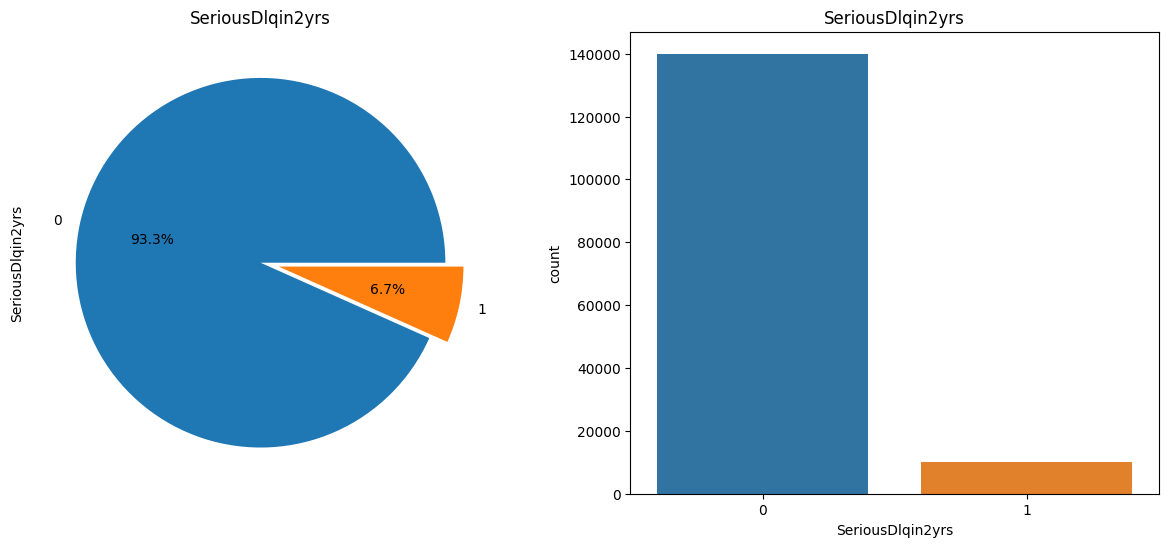

In [25]:
# check target column distribution by Pie Chart and bar chart..
temp_data = df['SeriousDlqin2yrs'].value_counts()

fig, axes = plt.subplots(1,2,figsize=(15,6))
temp_data.plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=axes[0])

axes[0].set_title('SeriousDlqin2yrs')
sns.countplot(data = df, x= 'SeriousDlqin2yrs', ax=axes[1])
axes[1].set_title('SeriousDlqin2yrs')
plt.show()

In [26]:
# from above fig. : clearly case of Class Inbalance problem
df['SeriousDlqin2yrs'].value_counts()

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

### clearly case of Class Inbalance problem

In [27]:
# statistical distribution of data
df.describe()

,CustomerID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


### Separating the dataset into train-test split

* **We will split the dataset into training(80%) on which modeling will be done using statistical/machine learning technqiues**
* **
* **Another one is the test dataset(20%) on which predictions will be made and check how the model is performing**

In [28]:
data = df.drop(columns = ['SeriousDlqin2yrs'], axis=1)

In [29]:
y = df['SeriousDlqin2yrs']

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
df_train, df_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42, stratify=y)
df_train.shape, df_test.shape

((120000, 11), (30000, 11))

In [33]:
# Splitting the dataset into train and test validation
# when test size give bigger then return sequence change (x_text, x_train, y_test, y_train)

# Another Unique method for train_test_split
# df_test, df_train, y_test, y_train = train_test_split(data, y, test_size = 0.8, random_state=42, stratify = y)


In [32]:
df_test.shape, df_train.shape

((30000, 11), (120000, 11))

In [34]:
150000*0.2

30000.0

In [35]:
print('Event rate in the training dataset : ',np.mean(y_train))
print()
print('Event rate in the test dataset : ',np.mean(y_test))
print()
print('Event rate in the entire dataset : ',np.mean(y))

Event rate in the training dataset :  0.06684166666666666

Event rate in the test dataset :  0.06683333333333333

Event rate in the entire dataset :  0.06684


* Event rate/Default Rate is maintainted in the training and test dataset after splitting in line with the entire dataset
* Event Rate to be same in train and test dataset by using stratify base on y that is Target column

### Event rate

Checking the event rate in the train-test split is important in classification problems because it helps ensure that both the training and test sets have a similar distribution of classes. This is important because if the event rate is significantly different between the two sets, it can result in biased model performance metrics.

In scikit-learn, we can maintain the event rate (also known as class balance or class distribution) in the train-test split by using the stratify parameter when splitting the data. The stratify parameter ensures that the same proportion of samples from each class is maintained in both the training and test sets.

For example, let's say we have a binary classification problem where the positive class is rare, occurring only 5% of the time in the entire dataset. If we randomly split the data into training and test sets without checking the event rate, it's possible that the rare positive class only appears in the test set and not in the training set. This can result in the model being poorly trained on the positive class and thus having poor performance on the test set. Conversely, if the positive class is over-represented in the training set, the model may perform well on the test set, but it may not generalize well to new data.

Therefore, by checking the event rate in the train-test split, we can ensure that both sets have a similar distribution of classes and thus provide a fair evaluation of the model's performance. This can help us avoid issues such as overfitting, underfitting, or bias in the model's performance metrics.

### Rare Event

Machine Learning algorithms tend to produce unsatisfactory classifiers when faced with imbalanced datasets. For any imbalanced data set, if the event to be predicted belongs to the minority class and the event rate is less than 5%, it is usually referred to as a rare event.

In [36]:
train = pd.concat([df_train, y_train], axis=1)
train.shape

(120000, 12)

In [37]:
test = pd.concat([df_test, y_test], axis=1)
test.shape

(30000, 12)

# Univariate Analysis using Training Numerical dataset

## distplot : histogram : how the data is distributed
The distplot function from the Seaborn library can be used for univariate analysis to visualize the distribution of a single variable. The function creates a histogram and an estimated probability density function (PDF) curve that shows the overall shape of the data distribution.

## boxplot : data is distributed along with medium and how the outliers in data
Boxplots are useful for univariate data analysis and outlier detection. Boxplots provide a visual representation of the distribution of a dataset by showing the median, quartiles, and any outliers in the data.

## skewness : skewness of normal distributed is 0, state that mean== median 
####  when skewness is positive in higher side, data is positive and rightly skewed, mean is higher side than the median
Skewness is a measure of the asymmetry of a distribution. It is a useful tool for univariate data analysis because it provides information about the shape of the distribution, specifically whether it is skewed to the left or right, or whether it is symmetrical.

## kurtosis : when data normally distributed then value is 3,( basically said tailness of data)
#### if kurtosis in thousand then there more number of outliers (large scale and higher side outlier)
#### if kurtosis is negative then tailness is lesser than Normal distribution
Kurtosis is a measure of the peakedness or flatness of a distribution, relative to a normal distribution. It is a useful tool for univariate data analysis because it provides information about the shape of the distribution, specifically how heavy or light the tails are compared to a normal distribution.

In [38]:
def plot_hist_boxplot(column):
    fig,[ax1,ax2]=plt.subplots(1,2,figsize=(12,5))
    sns.distplot(train[ train[column].notnull() ][column],ax=ax1)
    sns.boxplot(y=train[ train[column].notnull()][column],ax=ax2)
    print("skewness : ",skew(train[train[column].notnull()][column]))
    print("kurtosis : ",kurtosis(train[train[column].notnull()][column]))
    plt.show()

In [58]:
def plot_count_boxplot(column):
    fig,[ax1,ax2]=plt.subplots(1,2,figsize=(12,6))
    sns.countplot(data = train[train[column].notnull()], x=column, ax=ax1)
    sns.boxplot(y=train[train[column].notnull()][column],ax=ax2)
    print("skewness : ",skew(train[train[column].notnull()][column]))
    print("kurtosis : ",kurtosis(train[train[column].notnull()][column]))
    plt.show()

skewness :  100.53820302006339
kurtosis :  15559.574874151434


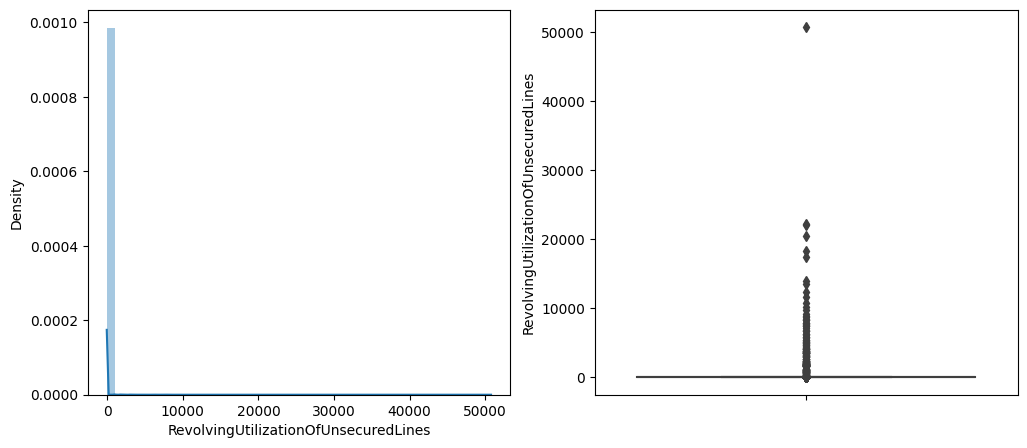

In [40]:
plot_hist_boxplot('RevolvingUtilizationOfUnsecuredLines')

* skewness is very high then RevolvingUtilizationOfUnsecuredLines data is positive and right skewed.
* And RevolvingUtilizationOfUnsecuredLines kurtosis value is very high in thousand then data has more outliers
* Outliers present at higher side of data

skewness :  0.18619637326841987
kurtosis :  -0.498427938670404


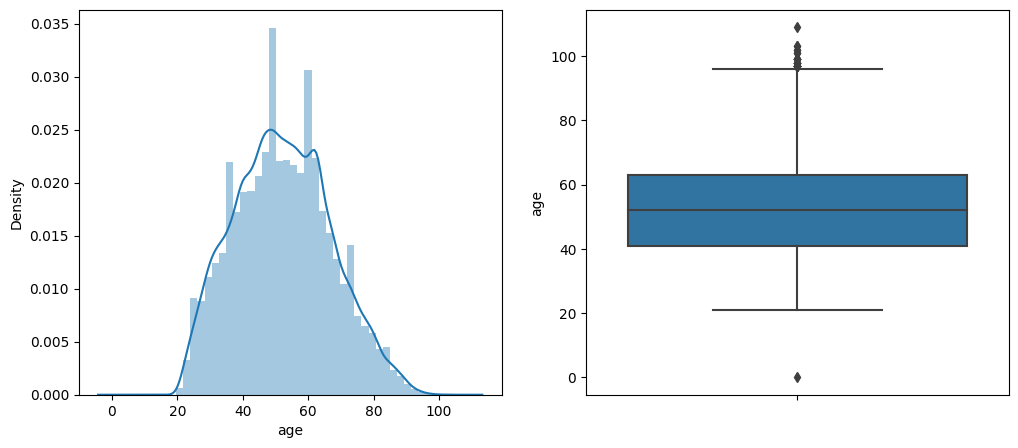

In [41]:
plot_hist_boxplot('age')

* Skewness for Age feature is near to 0 then data normall distribution
* Kurtosis is negative then then tailness of data lesser than Normal distribution

skewness :  99.14282373943726
kurtosis :  14370.263366125106


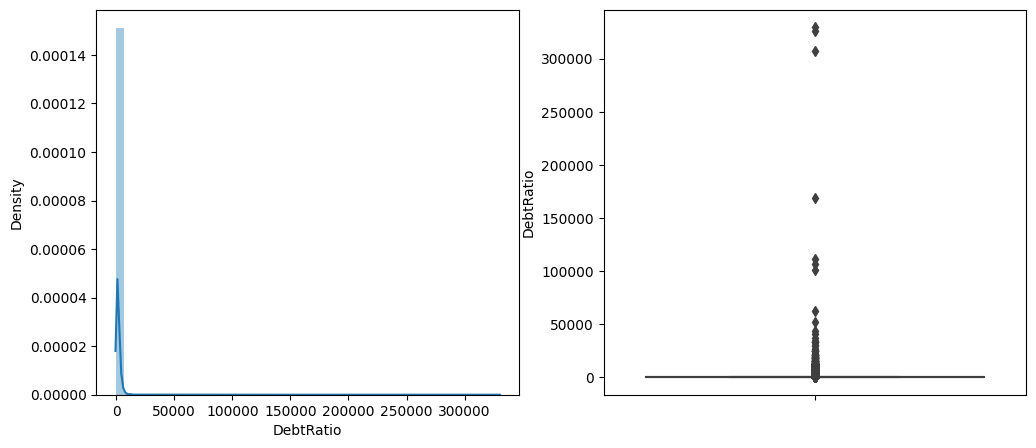

In [43]:
plot_hist_boxplot('DebtRatio')

skewness :  122.58760175290827
kurtosis :  21861.235154793823


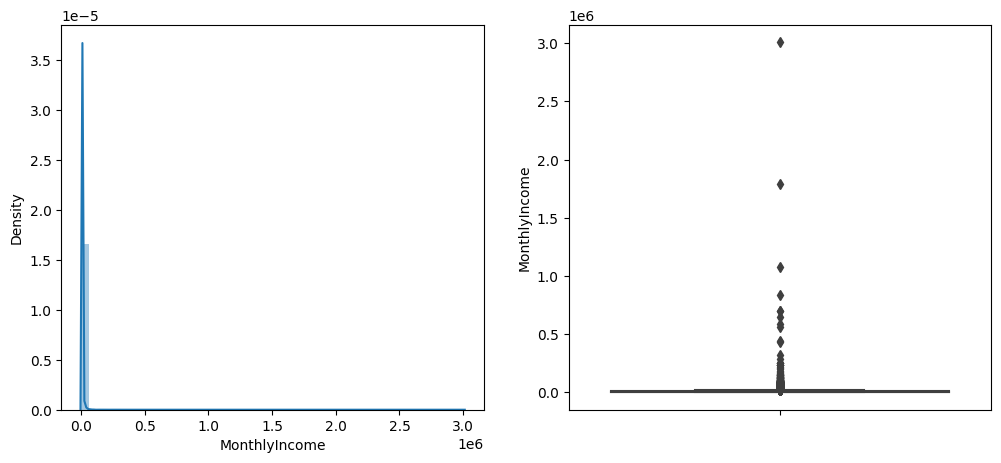

In [44]:
plot_hist_boxplot('MonthlyIncome')

skewness :  1.228631935202937
kurtosis :  3.1788690218615834


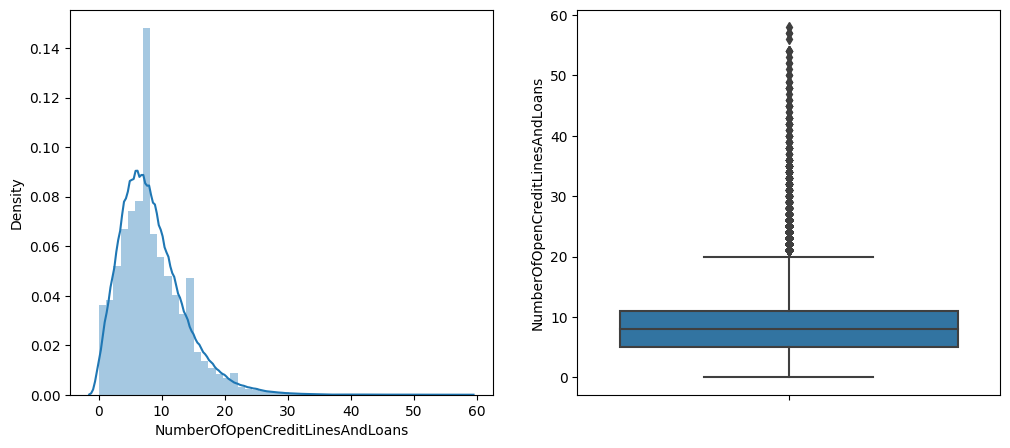

In [45]:
plot_hist_boxplot('NumberOfOpenCreditLinesAndLoans')

skewness :  3.752640736788862
kurtosis :  71.08765036833758


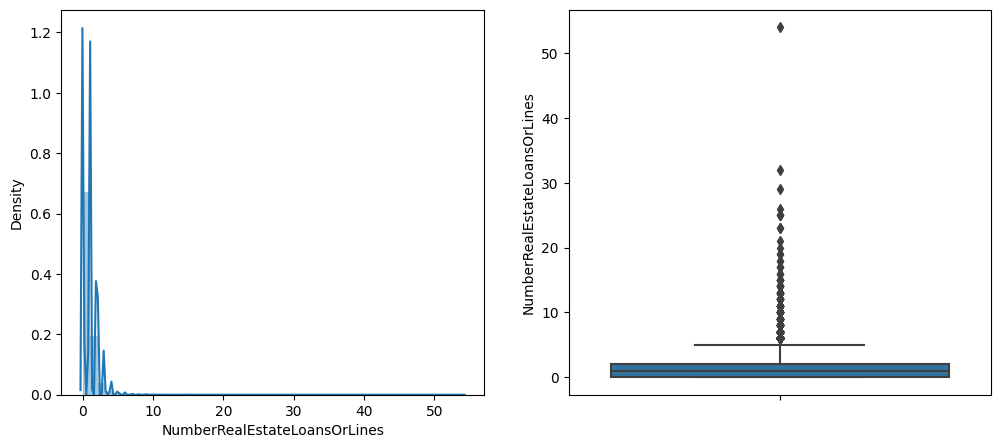

In [46]:
plot_hist_boxplot('NumberRealEstateLoansOrLines')

skewness :  1.5985560487376647
kurtosis :  3.1785476956522656


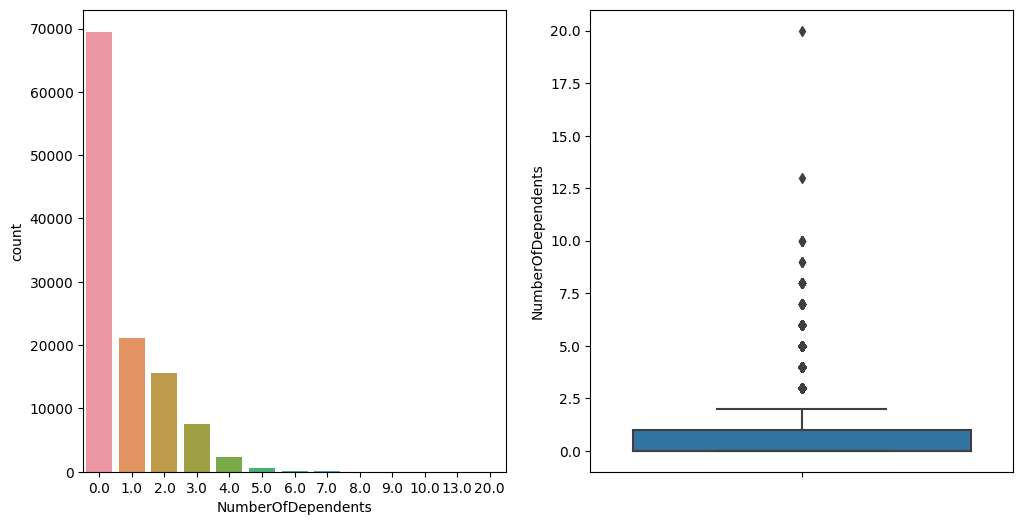

In [57]:
plot_count_boxplot('NumberOfDependents')

skewness :  22.656444686738023
kurtosis :  525.1798137690517


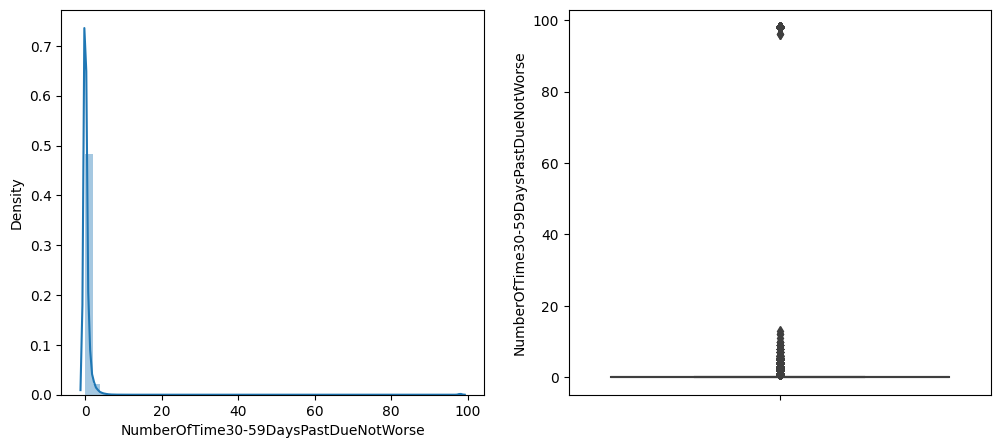

In [59]:
plot_hist_boxplot('NumberOfTime30-59DaysPastDueNotWorse')

skewness :  23.393598377179494
kurtosis :  548.632426633495


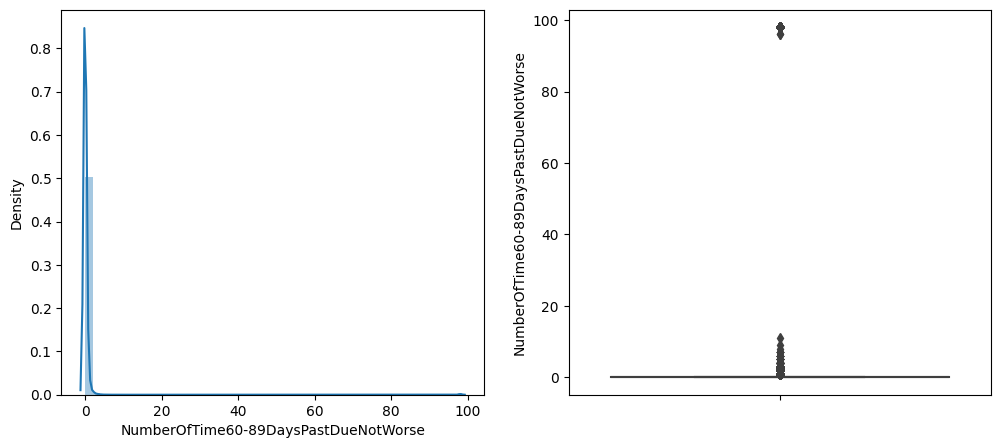

In [60]:
plot_hist_boxplot('NumberOfTime60-89DaysPastDueNotWorse')

skewness :  23.155584699487473
kurtosis :  540.8745184818808


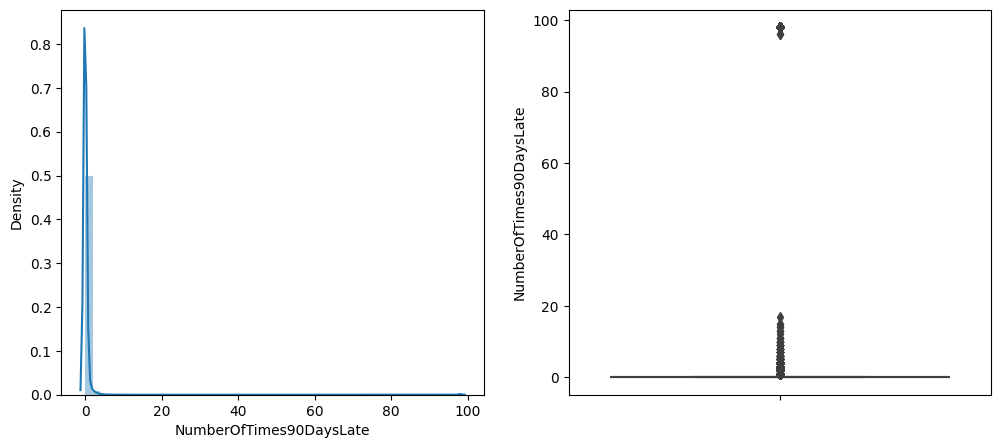

In [61]:
plot_hist_boxplot('NumberOfTimes90DaysLate')

In [62]:
cols_for_stats = ['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents']

In [63]:
skewness  = [] ; kurt = []
for column in cols_for_stats:
    skewness.append(skew(train[train[column].notnull()][column]))
    kurt.append(kurtosis(train[train[column].notnull()][column]))
    
stats = pd.DataFrame({'Skewness' : skewness, 'Kurtosis' : kurt},index=[col for col in cols_for_stats])
stats.sort_values(by=['Skewness'], ascending=False)

,Skewness,Kurtosis
MonthlyIncome,122.587602,21861.235155
RevolvingUtilizationOfUnsecuredLines,100.538203,15559.574874
DebtRatio,99.142824,14370.263366
NumberOfTime60-89DaysPastDueNotWorse,23.393598,548.632427
NumberOfTimes90DaysLate,23.155585,540.874518
NumberOfTime30-59DaysPastDueNotWorse,22.656445,525.179814
NumberRealEstateLoansOrLines,3.752641,71.087650
NumberOfDependents,1.598556,3.178548
NumberOfOpenCreditLinesAndLoans,1.228632,3.178869
age,0.186196,-0.498428


* * Data distribution in the columns are highly right skewed with very high kurtosis value showing extreme outliers in those columns
* * Except age which is little normally distributed

# Data Cleaning

#### Outlier Treatement

* *From the above boxplot graphs we can observe:*
* **
* *In the columns NumberOfTime30-59DaysPastDueNotWorse , NumberOfTime60-89DaysPastDueNotWorse and NumberOfTimes90DaysLate, we see delinquency range beyond 90 which is common across all 3 features.*
* **
* *Treating outliers for the columns  -- NumberOfTime30-59DaysPastDueNotWorse , NumberOfTime60-89DaysPastDueNotWorse and NumberOfTimes90DaysLate*

In [64]:
print("Unique values in '30-59 Days' values that are more than or equal to 90:",\
      np.unique( train[train['NumberOfTime30-59DaysPastDueNotWorse']>=90]\
                ['NumberOfTime30-59DaysPastDueNotWorse']))


print("Unique values in '60-89 Days' when '30-59 Days' values are more than or equal to 90:",\
      np.unique(train[train['NumberOfTime30-59DaysPastDueNotWorse']>=90]\
                ['NumberOfTime60-89DaysPastDueNotWorse']))


print("Unique values in '90 Days' when '30-59 Days' values are more than or equal to 90:",\
      np.unique(train[train['NumberOfTime30-59DaysPastDueNotWorse']>=90]
                ['NumberOfTimes90DaysLate']))


print("Unique values in '30-59 Days' values that are less than 90:",\
      np.unique(train[train['NumberOfTime30-59DaysPastDueNotWorse']<90]\
                ['NumberOfTime30-59DaysPastDueNotWorse']))


print("Unique values in '60-89 Days' when '30-59 Days' values are less than 90:",\
      np.unique(train[train['NumberOfTime30-59DaysPastDueNotWorse']<90]\
                ['NumberOfTime60-89DaysPastDueNotWorse']))


print("Unique values in '90 Days' when '30-59 Days' values are less than 90:",\
      np.unique(train[train['NumberOfTime30-59DaysPastDueNotWorse']<90]\
                ['NumberOfTimes90DaysLate']))


print("Proportion of positive class with special 96/98 values:",\
      round(  train[train['NumberOfTime30-59DaysPastDueNotWorse']>=90]['SeriousDlqin2yrs'].sum()*100/
      len(train[train['NumberOfTime30-59DaysPastDueNotWorse']>=90]['SeriousDlqin2yrs']),  2),'%')

Unique values in '30-59 Days' values that are more than or equal to 90: [96 98]
Unique values in '60-89 Days' when '30-59 Days' values are more than or equal to 90: [96 98]
Unique values in '90 Days' when '30-59 Days' values are more than or equal to 90: [96 98]
Unique values in '30-59 Days' values that are less than 90: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
Unique values in '60-89 Days' when '30-59 Days' values are less than 90: [ 0  1  2  3  4  5  6  7  8  9 11]
Unique values in '90 Days' when '30-59 Days' values are less than 90: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17]
Proportion of positive class with special 96/98 values: 54.67 %


In [65]:
train[train['NumberOfTime30-59DaysPastDueNotWorse']>=90]['SeriousDlqin2yrs'].sum()*100

11700

In [66]:
len(train[train['NumberOfTime30-59DaysPastDueNotWorse']>=90]['SeriousDlqin2yrs'])

214

In [67]:
12000/216

55.55555555555556

* *We can see from the following that when records in column 'NumberOfTime30-59DaysPastDueNotWorse' are more than 90, the other columns that records number of times payments are past due X days also have the same values. We will classify these as special labels since the proportion of positive class is abnormally high at 55.56%.*
* **
* *These 96 and 98 values can be viewed as accounting errors. Hence, we would replace them with the maximum value before 96 i.e. 12, 11 and 17*

In [68]:
train.loc[train['NumberOfTime30-59DaysPastDueNotWorse'] >= 90, 'NumberOfTime30-59DaysPastDueNotWorse'] = 12
train.loc[train['NumberOfTime60-89DaysPastDueNotWorse'] >= 90, 'NumberOfTime60-89DaysPastDueNotWorse'] = 11
train.loc[train['NumberOfTimes90DaysLate'] >= 90, 'NumberOfTimes90DaysLate'] = 17

In [69]:
print("Unique values in 30-59Days", np.unique(train['NumberOfTime30-59DaysPastDueNotWorse']))
print("Unique values in 60-89Days", np.unique(train['NumberOfTime60-89DaysPastDueNotWorse']))
print("Unique values in 90Days", np.unique(train['NumberOfTimes90DaysLate']))

Unique values in 30-59Days [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
Unique values in 60-89Days [ 0  1  2  3  4  5  6  7  8  9 11]
Unique values in 90Days [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17]


### similar on test data

In [70]:
print("Unique values in '30-59 Days' values that are more than or equal to 90:",\
      np.unique(test[test['NumberOfTime30-59DaysPastDueNotWorse']>=90]\
                ['NumberOfTime30-59DaysPastDueNotWorse']))


print("Unique values in '60-89 Days' when '30-59 Days' values are more than or equal to 90:",\
      np.unique(test[test['NumberOfTime30-59DaysPastDueNotWorse']>=90]\
                ['NumberOfTime60-89DaysPastDueNotWorse']))


print("Unique values in '90 Days' when '30-59 Days' values are more than or equal to 90:",\
      np.unique(test[test['NumberOfTime30-59DaysPastDueNotWorse']>=90]\
                ['NumberOfTimes90DaysLate']))


print("Unique values in '30-59 Days' values that are less than 90:",\
      np.unique(test[test['NumberOfTime30-59DaysPastDueNotWorse']<90]\
                ['NumberOfTime30-59DaysPastDueNotWorse']))


print("Unique values in '60-89 Days' when '30-59 Days' values are less than 90:",\
      np.unique(test[test['NumberOfTime30-59DaysPastDueNotWorse']<90]\
                ['NumberOfTime60-89DaysPastDueNotWorse']))


print("Unique values in '90 Days' when '30-59 Days' values are less than 90:",\
      np.unique(test[test['NumberOfTime30-59DaysPastDueNotWorse']<90]\
                ['NumberOfTimes90DaysLate']))


Unique values in '30-59 Days' values that are more than or equal to 90: [96 98]
Unique values in '60-89 Days' when '30-59 Days' values are more than or equal to 90: [96 98]
Unique values in '90 Days' when '30-59 Days' values are more than or equal to 90: [96 98]
Unique values in '30-59 Days' values that are less than 90: [0 1 2 3 4 5 6 7 8 9]
Unique values in '60-89 Days' when '30-59 Days' values are less than 90: [0 1 2 3 4 5 6 7 8]
Unique values in '90 Days' when '30-59 Days' values are less than 90: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]


* *Since, these values exist in Test Set as well. Therefore, replacing them with maximum values before 96 and 98 i.e. 13, 7 and 15.*

In [71]:
test.loc[test['NumberOfTime30-59DaysPastDueNotWorse'] >= 90, 'NumberOfTime30-59DaysPastDueNotWorse'] = 13
test.loc[test['NumberOfTime60-89DaysPastDueNotWorse'] >= 90, 'NumberOfTime60-89DaysPastDueNotWorse'] = 7
test.loc[test['NumberOfTimes90DaysLate'] >= 90, 'NumberOfTimes90DaysLate'] = 15


print("Unique values in 30-59Days", np.unique(test['NumberOfTime30-59DaysPastDueNotWorse']))
print("Unique values in 60-89Days", np.unique(test['NumberOfTime60-89DaysPastDueNotWorse']))
print("Unique values in 90Days", np.unique(test['NumberOfTimes90DaysLate']))

Unique values in 30-59Days [ 0  1  2  3  4  5  6  7  8  9 13]
Unique values in 60-89Days [0 1 2 3 4 5 6 7 8]
Unique values in 90Days [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15]


 * Checking for ***DebtRatio*** and ***RevolvingUtilizationOfUnsecuredLines.***

In [72]:
print('Debt Ratio: \n',train['DebtRatio'].describe())
print('\nRevolving Utilization of Unsecured Lines: \n',train['RevolvingUtilizationOfUnsecuredLines'].describe())

Debt Ratio: 
 count    120000.000000
mean        352.271245
std        2093.709509
min           0.000000
25%           0.175330
50%           0.366194
75%           0.860833
max      329664.000000
Name: DebtRatio, dtype: float64

Revolving Utilization of Unsecured Lines: 
 count    120000.000000
mean          6.128916
std         253.361490
min           0.000000
25%           0.029593
50%           0.153318
75%           0.557832
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64


* **Debt Ratio**

* As you can see data is right skewed. So, our main aim would be to check the potential outliers beyond 95% quantiles. However, since our data is 120,000, let's consider 95% and 97.5% quantiles for our further analysis.

In [75]:
train[train['DebtRatio'] >= train['DebtRatio'].quantile(0.95)].describe()

,CustomerID,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
count,6002.000000,6002.000000,6002.000000,6002.000000,6002.000000,299.000000,6002.000000,6002.000000,6002.000000,6002.000000,5595.000000,6002.000000
mean,74218.317894,11.922950,53.535322,0.275408,4409.995168,0.086957,10.626791,0.057647,1.930357,0.057481,0.531546,0.053149
std,43062.054487,301.921178,10.919080,0.764108,8162.384932,0.282244,5.155215,0.384254,1.234191,0.317561,1.015009,0.224349
min,51.000000,0.000000,25.000000,0.000000,2441.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36072.750000,0.041338,46.000000,0.000000,2883.250000,0.000000,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,74214.000000,0.183308,54.000000,0.000000,3492.000000,0.000000,10.000000,0.000000,2.000000,0.000000,0.000000,0.000000
75%,111521.500000,0.530505,62.000000,0.000000,4614.750000,0.000000,13.000000,0.000000,2.000000,0.000000,1.000000,0.000000
max,149998.000000,13930.000000,93.000000,10.000000,329664.000000,1.000000,43.000000,11.000000,23.000000,5.000000,10.000000,1.000000


In [76]:
train[train['DebtRatio'] >= train['DebtRatio'].quantile(0.95)][['SeriousDlqin2yrs','MonthlyIncome']].describe()

,SeriousDlqin2yrs,MonthlyIncome
count,6002.000000,299.000000
mean,0.053149,0.086957
std,0.224349,0.282244
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


* Here we can observe:
* **
* Out of 6002 customers falling in the last 5 percentile of the data i.e. the number of times their debt is higher than their income, only 299 have Monthly Income values.
* The Max for Monthly Income is 1 and Min is 0 which makes us wonder that are data entry errors.
* Check whether the Serious Delinquency in 2 years and Monthly Income values are equal.

In [53]:
train.sample()

,CustomerID,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
26131,26132,0.126285,56,0,0.879324,8700.0,16,0,2,0,0.0,0


In [77]:
train[(train["DebtRatio"] >= train["DebtRatio"].quantile(0.95)) \
      & (train['SeriousDlqin2yrs'] == train['MonthlyIncome'])  ].shape

(260, 12)

In [78]:
train[(train["DebtRatio"] >= train["DebtRatio"].quantile(0.95)) \
      & (train['SeriousDlqin2yrs'] == train['MonthlyIncome'])  ].sample(5)[['MonthlyIncome','SeriousDlqin2yrs']]

,MonthlyIncome,SeriousDlqin2yrs
89407,0.0,0
67937,0.0,0
90969,0.0,0
69978,0.0,0
102125,0.0,0


In [79]:
train[(train["DebtRatio"] >= train["DebtRatio"].quantile(0.95)) & (train['SeriousDlqin2yrs'] == train['MonthlyIncome'])].shape[0]

260

* Hence, our suspects are true and there are 260 out of 299 rows where **Monthly Income is equal to the Serious Delinquencies in 2 years**. Hence we will **remove these 260 outliers** from our analysis as their current values aren't useful for our predictive modelling and will add to the bias and variance.

In [85]:
train.shape[0]-260

119740

In [81]:
new_train = train[-((train["DebtRatio"] > train["DebtRatio"].quantile(0.95)) & \
                    (train['SeriousDlqin2yrs'] == train['MonthlyIncome']))]
new_train.shape

(119740, 12)

## **Revolving Utilization of Unsecured Lines**

* This field basically represents the ratio of the amount owed by the credit limit of a customer. 
* A ratio higher than 1 is considered to be a serious defaulter. 
* A Ratio of 10 functionally also seems possible, 
* let's see how many of these customers have the Revolving Utilization of Unsecured Lines greater than 10.

In [83]:
new_train[new_train['RevolvingUtilizationOfUnsecuredLines']>10].describe()

,CustomerID,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
count,190.000000,190.000000,190.000000,190.000000,190.000000,138.000000,190.000000,190.000000,190.000000,190.000000,180.000000,190.000000
mean,78966.321053,3667.835619,50.136842,0.205263,629.751099,8550.413043,5.915789,0.094737,1.231579,0.110526,0.716667,0.089474
std,41700.411565,5220.729389,14.442816,0.621462,1942.989571,7080.434043,3.031277,0.651797,1.116994,0.628591,1.042531,0.286180
min,294.000000,11.385230,24.000000,0.000000,0.000800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44682.250000,958.250000,38.000000,0.000000,0.216587,4305.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,83662.000000,2047.000000,47.500000,0.000000,0.408062,6500.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,114581.250000,4254.000000,61.500000,0.000000,82.250000,10068.250000,7.750000,0.000000,2.000000,0.000000,1.000000,0.000000
max,149280.000000,50708.000000,85.000000,3.000000,21395.000000,44472.000000,20.000000,8.000000,9.000000,7.000000,4.000000,1.000000


* Despite owing thousands, out of these these 190 people, RevolvingUtilizationOfUnsecuredLines greater than and equal to 10, that means peoples are falling in the serious delinquency which means this might be another error. 
* Even if it is not an error, these numbers will add huge bias and variance to our final predictions. 
* Therefore, the best decision is to remove these values. RevolvingUtilizationOfUnsecuredLines>=10

In [87]:
new_train[new_train['RevolvingUtilizationOfUnsecuredLines']>=10].shape

(190, 12)

In [86]:
new_train.shape[0]-190

119550

In [88]:
new_train = new_train[new_train['RevolvingUtilizationOfUnsecuredLines']<=10]
new_train.shape

(119550, 12)

In [89]:
new_test = test[test['RevolvingUtilizationOfUnsecuredLines']<=10]
new_test.shape

(29949, 12)

## **Age**

In [90]:
new_train[['age', 'SeriousDlqin2yrs']].describe()

,age,SeriousDlqin2yrs
count,119550.000000,119550.000000
mean,52.295466,0.066934
std,14.778405,0.249909
min,0.000000,0.000000
25%,41.000000,0.000000
50%,52.000000,0.000000
75%,63.000000,0.000000
max,109.000000,1.000000


* It can be observed that the data includes a record with age = 0 which is not a valid age ,updating the record with mode age.

In [91]:
age_mode = new_train['age'].mode()[0]
age_mode

49

In [92]:
new_train[new_train['age']<1]

,CustomerID,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
65695,65696,1.0,0,1,0.436927,6000.0,6,0,2,0,2.0,0


* We will be replacing the error/odd value with the mode

In [93]:
new_train.loc[new_train['age'] == 0, 'age'] = age_mode

In [94]:
new_train['age'].min()

21

In [95]:
new_test[new_test['age']<1]

,CustomerID,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs


* No such discrepancy is found in the test dataset

## Missing Value Treatment

* *Since MonthlyIncome is an integer value, we will replace the nulls with the median values instead of mean as it was heavily right skewed.*
* **
* *Number of Dependents can be characterized as a categorical variable, hence if customers have NA for number of dependents, it means that they do not have any dependents. 
Filling either by mode which is 0 or by the above assumption is the same.Therefore, we fill them with zeros.*

In [96]:
def MissingHandler(df):
    
    DataMissing = df.isnull().sum()*100/len(df)
    DataMissingByColumn = pd.DataFrame({'Percentage Nulls':DataMissing})
    DataMissingByColumn.sort_values(by='Percentage Nulls', ascending=False, inplace=True)
    return DataMissingByColumn[ DataMissingByColumn['Percentage Nulls']>0 ]

MissingHandler(new_train)

,Percentage Nulls
MonthlyIncome,19.759933
NumberOfDependents,2.608114


In [97]:
new_train['MonthlyIncome'].fillna(new_train['MonthlyIncome'].median(), inplace=True)
new_train['NumberOfDependents'].fillna(0, inplace = True)

* **Filling missing values with the same logic on the validation and the test dataset**
* fill Missing value MonthlyIncome by median
* And fill missing value in Number of dependents by 0

In [98]:
new_test['MonthlyIncome'].fillna(new_test['MonthlyIncome'].median(), inplace=True)
new_test['NumberOfDependents'].fillna(0, inplace = True)

* ** Rechecking Nulls**

In [99]:
MissingHandler(new_train)

,Percentage Nulls


In [100]:
MissingHandler(new_test)

,Percentage Nulls


In [101]:
MissingHandler(df_test)

,Percentage Nulls
MonthlyIncome,20.186667
NumberOfDependents,2.653333


## **Correlation Plot**

Correlation is a statistical measure that describes the strength and direction of a relationship between two variables. In data analysis, we often use correlation to understand the relationship between different features in a dataset or between a feature and a target variable.

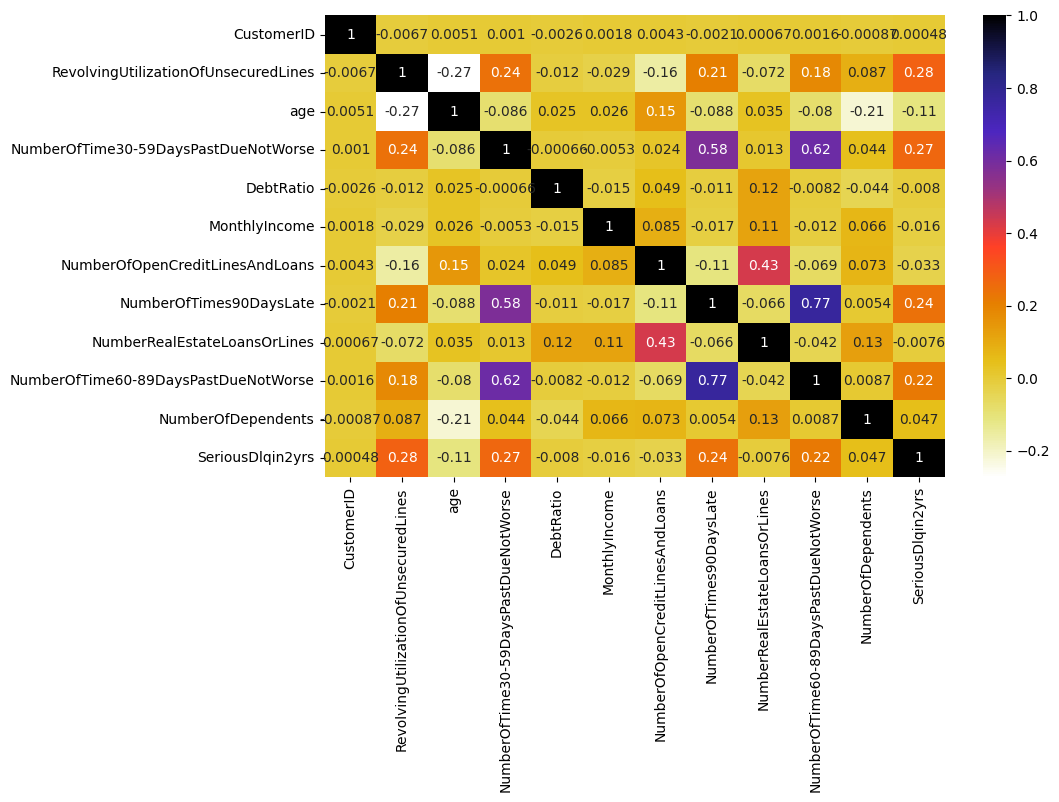

In [102]:
plt.figure(figsize=(10,6))
sns.heatmap(  new_train.corr(), annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

* From the correlation heatmap above, we can see the most correlated values to SeriousDlqin2yrs are **NumberOfTime30-59DaysPastDueNotWorse , NumberOfTime60-89DaysPastDueNotWorse and NumberOfTimes90DaysLate**.

* **NumberOfOpenCreditLinesAndLoans** and **NumberRealEstateLoansOrLines** also have a significant correlation

# Bivariate Analysis

Bivariate analysis is a statistical method used to examine the relationship between two variables.

## Boxplot: How the data is distributed at various percentile and what the behaviour of outliers

Boxplots can be useful in bivariate analysis to visualize the distribution of one variable across different categories of another variable. Here are the steps to use a boxplot in bivariate analysis:

Select the two variables you want to analyze. One variable should be continuous, and the other should be categorical.

Create a boxplot for the continuous variable, with the categories of the categorical variable on the x-axis. You can use different colors or patterns to represent each category.

Examine the boxplot to identify any differences in the distribution of the continuous variable across the categories of the categorical variable. Look for differences in the median, quartiles, range, and outliers.

Interpret the results of the boxplot to draw conclusions about the relationship between the two variables. For example, if the boxplot shows that the median of the continuous variable is higher in one category than in another, this may suggest a positive relationship between the two variables.

To enhance the analysis, you can also calculate summary statistics, such as means or standard deviations, for the continuous variable within each category of the categorical variable and compare them across categories.

Overall, boxplots are a useful tool in bivariate analysis to quickly visualize the relationship between a continuous and categorical variable and identify any patterns or differences in their distributions.

## Violineplot: what the density of data and various percentile against target variable

Violin plots are another type of graphical representation that can be used in bivariate analysis to compare the distribution of a continuous variable across different categories of a categorical variable. Here are the steps to use a violin plot in bivariate analysis:

Select the two variables you want to analyze. One variable should be continuous, and the other should be categorical.

Create a violin plot for the continuous variable, with the categories of the categorical variable on the x-axis. The shape of each violin plot shows the distribution of the continuous variable within each category.

Examine the violin plot to identify any differences in the distribution of the continuous variable across the categories of the categorical variable. Look for differences in the shape, width, and height of the violins.

Interpret the results of the violin plot to draw conclusions about the relationship between the two variables. For example, if the violin plot shows that the width of the violin is wider in one category than in another, this may suggest a higher variability of the continuous variable in that category.

To enhance the analysis, you can also calculate summary statistics, such as means or standard deviations, for the continuous variable within each category of the categorical variable and compare them across categories.

Overall, violin plots are a useful tool in bivariate analysis to visualize the relationship between a continuous and categorical variable and identify any patterns or differences in their distributions. They can provide more information than boxplots, especially for complex distributions, but they can also be more difficult to interpret.

In [103]:
def boxplot_violinplot(col1, col2):
    fig,[ax1,ax2]=plt.subplots(1,2,figsize=(12,5))
    sns.boxplot(x=col1, y=col2, data=new_train, palette='Set3',ax=ax1)
    sns.violinplot(x=col1, y=col2, data=new_train, palette='Set3',ax=ax2)
    plt.show()

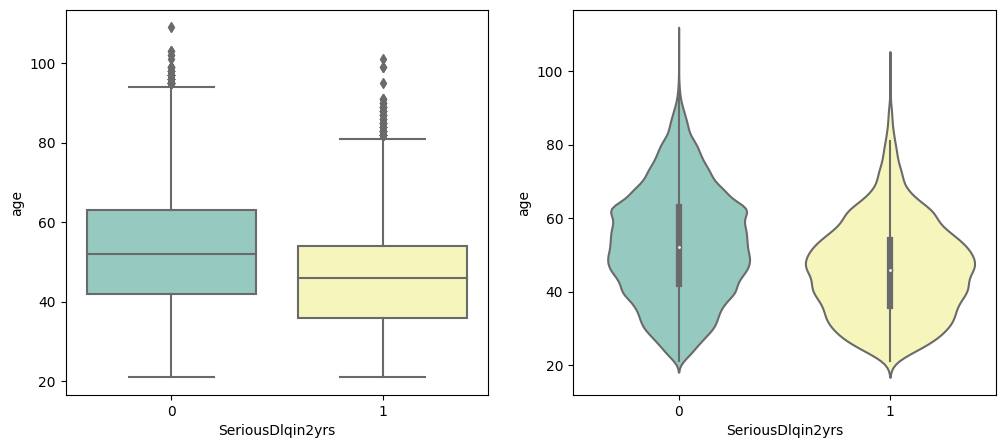

In [104]:
boxplot_violinplot('SeriousDlqin2yrs', 'age')

* Age has no significant on the target variable though most of the customers are in the mid 50 who has serious delinquency in 2 years

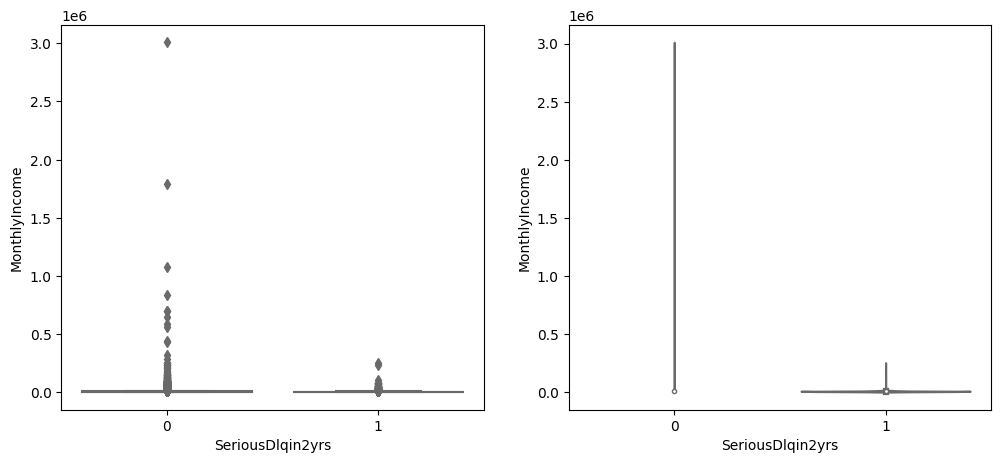

In [105]:
boxplot_violinplot('SeriousDlqin2yrs', 'MonthlyIncome')

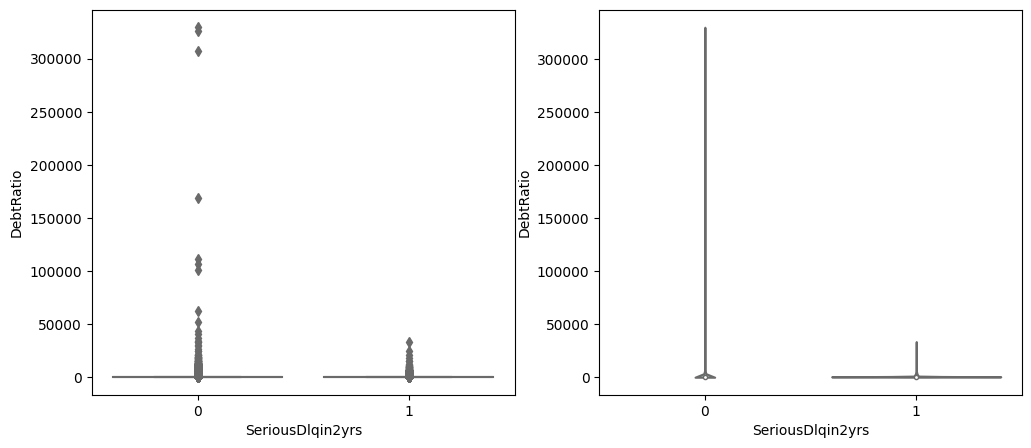

In [107]:
boxplot_violinplot('SeriousDlqin2yrs','DebtRatio')

* MonthlyIncome is less similar relationship with Target feature SeriousDlqin2yrs when target is 0 or 1
* DebtRatio is less similar relationship with Target feature SeriousDlqin2yrs when target is 0 or 1


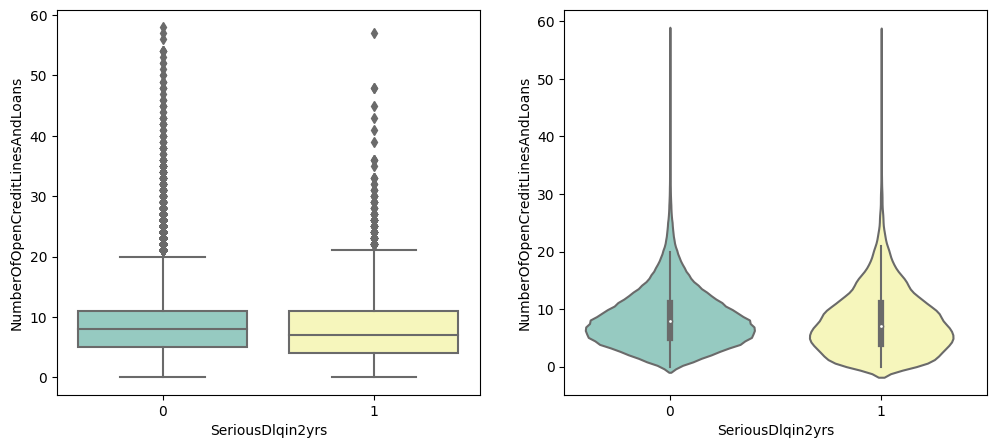

In [108]:
boxplot_violinplot('SeriousDlqin2yrs', 'NumberOfOpenCreditLinesAndLoans')

* It is expected that the higher the utlization ratio, the higher the default rate is. Let me look into that by plotting the utlization ratio to default rate

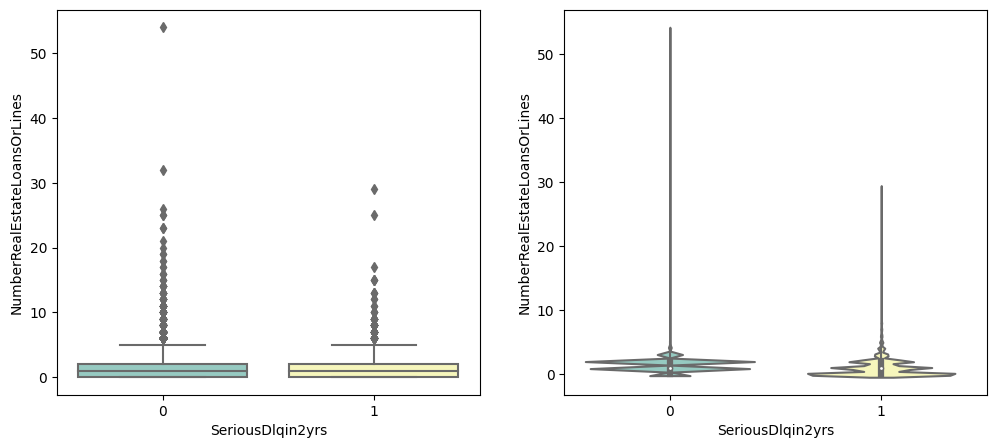

In [109]:
boxplot_violinplot('SeriousDlqin2yrs', 'NumberRealEstateLoansOrLines')

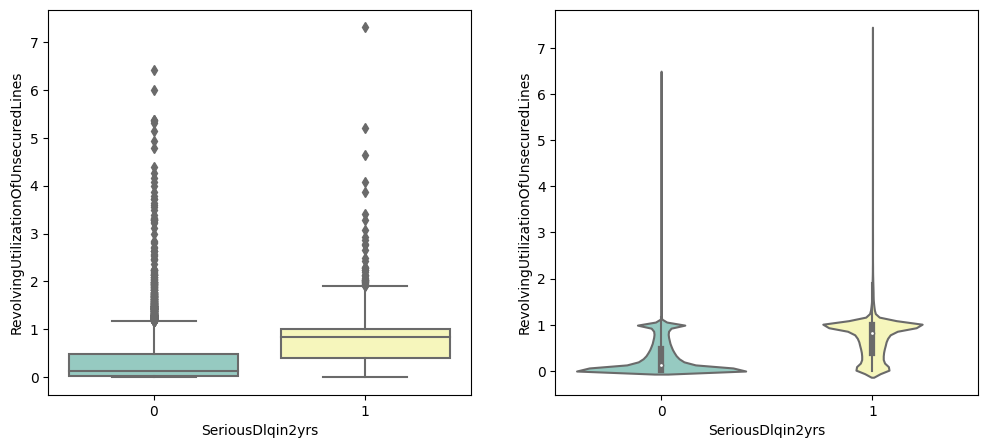

In [110]:
boxplot_violinplot('SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines')

* Feature description itself more the utlization of the credit resources or the ratio of amount owe to credit is more, serious delinquency is on a bit higher side

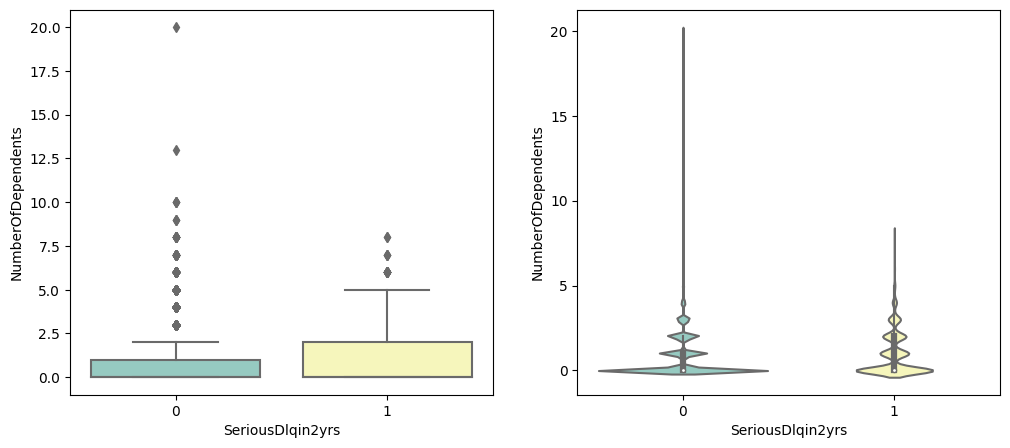

In [111]:
boxplot_violinplot('SeriousDlqin2yrs', 'NumberOfDependents')

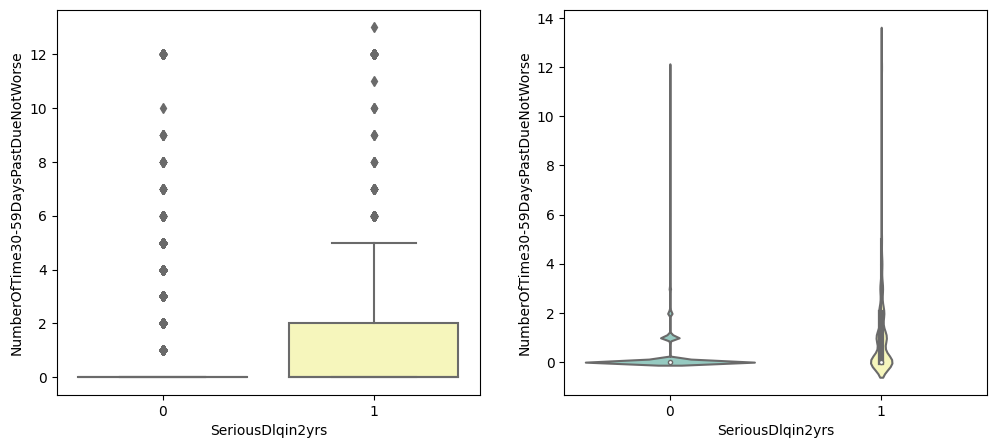

In [112]:
boxplot_violinplot('SeriousDlqin2yrs', 'NumberOfTime30-59DaysPastDueNotWorse')

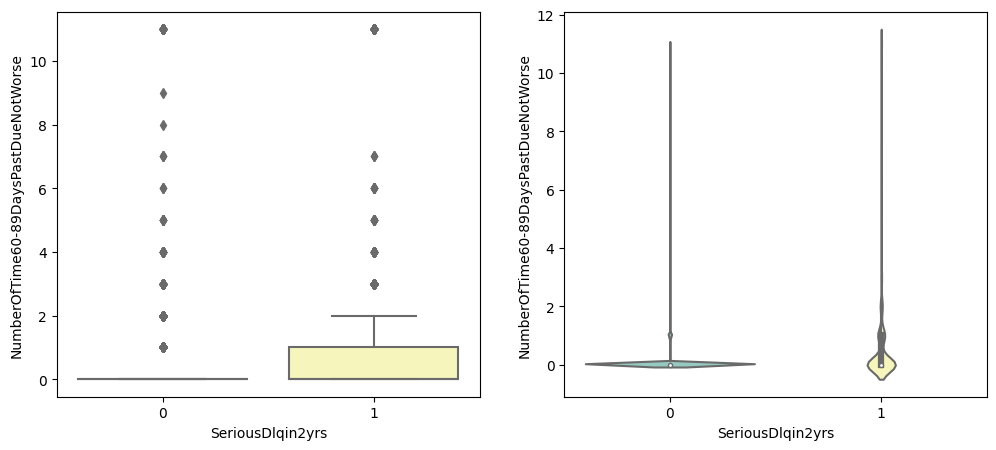

In [113]:
boxplot_violinplot('SeriousDlqin2yrs', 'NumberOfTime60-89DaysPastDueNotWorse')

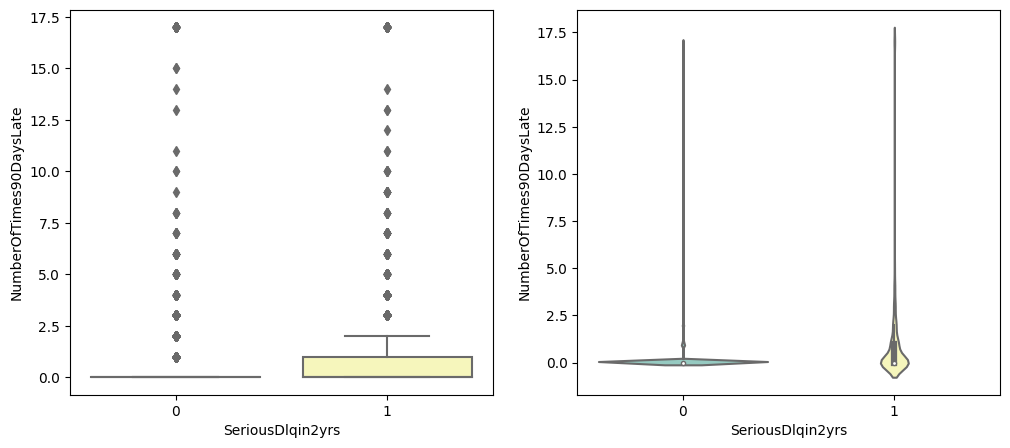

In [114]:
boxplot_violinplot('SeriousDlqin2yrs', 'NumberOfTimes90DaysLate')

* It is expected that the higher the utlization ratio, the higher the default rate is. 
Let me look into that by plotting the utlization ratio to default rate

# Feature Engineering

* combine both new train and test data in list after cleaning data and outliers treatments.
* And combined dataset list use for feature engineering

In [115]:
dataset = [new_train, new_test]

In [117]:
new_train['NumberOfDependents'].unique()

array([ 2.,  0.,  3.,  1.,  4.,  7.,  6.,  5.,  9.,  8., 10., 13., 20.])

* Making combined features

In [118]:
for data in dataset:
    
    data['CombinedPastDue']     = data['NumberOfTime30-59DaysPastDueNotWorse'] +\
                                  data['NumberOfTime60-89DaysPastDueNotWorse'] + \
                                  data['NumberOfTimes90DaysLate']
    data['CombinedCreditLoans'] = data['NumberOfOpenCreditLinesAndLoans'] + data['NumberRealEstateLoansOrLines']
    
new_train.columns    

Index(['CustomerID', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'SeriousDlqin2yrs', 'CombinedPastDue',
       'CombinedCreditLoans'],
      dtype='object')

In [119]:
for data in dataset:

    data['MonthlyIncomePerPerson'] = data['MonthlyIncome']/(data['NumberOfDependents']+1)
    
    data['MonthlyDebt']            = data['MonthlyIncome']*data['DebtRatio']
    
    data['isRetired']              = np.where((data['age'] > 65), 1, 0)
    
    data['RevolvingLines']         = data['NumberOfOpenCreditLinesAndLoans']-data['NumberRealEstateLoansOrLines']
    data['hasRevolvingLines']      = np.where((data['RevolvingLines']>0),1,0)
    
    data['hasMultipleRealEstates'] = np.where((data['NumberRealEstateLoansOrLines']>=2),1,0)
    
    data['IsAlone']                = np.where((data['NumberOfDependents']==0),1,0)
    
new_train.columns

Index(['CustomerID', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'SeriousDlqin2yrs', 'CombinedPastDue',
       'CombinedCreditLoans', 'MonthlyIncomePerPerson', 'MonthlyDebt',
       'isRetired', 'RevolvingLines', 'hasRevolvingLines',
       'hasMultipleRealEstates', 'IsAlone'],
      dtype='object')

* Interaction of the features on both train and test dataset 
* create new column 
* **CombinedPastDue**: sum of all dues columns 
      (NumberOfTime30-59DaysPastDueNotWorse, NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate)
* **CombinedCreditLoans**: sum of all loan columns
      (NumberOfOpenCreditLinesAndLoans, NumberRealEstateLoansOrLines)
* **MonthlyIncomePerPerson**: Monthly Income divided by number of dependent And plus 1 is self
* **MonthlyDebt**: Monthly Income multiply by Debt Ratio
* **isRetired**: Binary ( 1 for age is greater than 1 otherwise 0)
* **RevolvingLines**: subtract NumberOfOpenCreditLinesAndLoans from NumberRealEstateLoansOrLines
* **hasRevolvingLines**: Above RevolvingLines is greater than 0 then set it 1 otherwise 0 (Binary)
* **hasMultipleRealEstates**: NumberRealEstateLoansOrLines is greater than equal to 2 then set 1 otherwise 0 (Binary)
* **IsAlone**: if NumberOfDependents is 0 then set 1 otherwise 0 (Binary)


In [120]:
new_train.shape, new_test.shape

((119550, 21), (29949, 21))

In [121]:
print("Check Event Rate for Target feature in both Train and Test datset")
print(new_train['SeriousDlqin2yrs'].sum()/len(new_train))
print()
print(new_test['SeriousDlqin2yrs'].sum()/len(new_test))

Check Event Rate for Target feature in both Train and Test datset
0.06693433709744877

0.06694714347724465


In [122]:
new_train.to_csv('Data/new_train.csv', index=False)

In [123]:
new_test.to_csv('Data/new_test.csv', index=False)